In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [2]:
le = LabelEncoder()
images = []
labels = []

training_path = 'data/raw/character_set1/training_data/'
testing_path = 'data/raw/character_set1/testing_data/'


In [3]:
dir_list = os.listdir(training_path)
for i in dir_list:
  dir = os.path.join(training_path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

## Print out details of X and y

In [4]:
X = np.array(images)
print("len(X): ",len(X))
print("X.shape: ", X.shape)

y = np.array(labels)
print("len(y): ",len(y))
print("y.shape: ", y.shape)


len(X):  20628
X.shape:  (20628, 64, 64, 3)
len(y):  20628
y.shape:  (20628,)


In [5]:
le = LabelEncoder()
y = le.fit_transform(y)
X_sh, y_sh = shuffle(X, y, random_state=42)

# Create Keras model
create a neural network model

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

/Users/nattapat/Library/Python/3.11/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


Epoch 1/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6050 - loss: 1.4624 - val_accuracy: 0.9314 - val_loss: 0.2573
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9378 - loss: 0.2075 - val_accuracy: 0.9273 - val_loss: 0.2437
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9536 - loss: 0.1342 - val_accuracy: 0.9484 - val_loss: 0.1765
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9618 - loss: 0.1053 - val_accuracy: 0.9460 - val_loss: 0.1871
Epoch 5/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9687 - loss: 0.0856 - val_accuracy: 0.9527 - val_loss: 0.1563
Epoch 6/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9709 - loss: 0.0813 - val_accuracy: 0.9576 - val_loss: 0.1584
Epoch 7/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9754 - loss: 0.0598 - val_accuracy: 0.9573 - val_loss: 0.1699
Epoch 8/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9776 - loss: 0.0599 - 

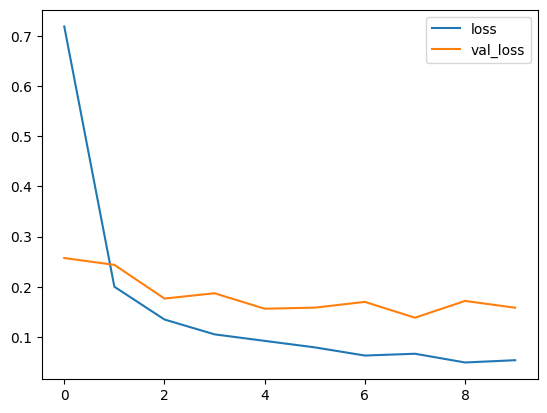

In [9]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=25, epochs=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [10]:
test_images = []
test_labels = []

dir_list = os.listdir(testing_path)
for i in dir_list:
  dir = os.path.join(testing_path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [11]:
X_test = np.array(test_images)
y_test = np.array(test_labels)
le = LabelEncoder()
y_test = le.fit_transform(y_test) 

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss,test_accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9812 - loss: 0.0466
0.03776358440518379 0.9841269850730896


In [ ]:
def detect_text_regions(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))  # Smaller kernel
    # dilated = cv2.dilate(thresh, kernel, iterations=1)

    
    # Find contours (regions of characters)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)  # filter out too small regions
        regions.append((x, y, w, h))
            
    return regions

In [14]:
def sort_bounding_boxes(regions):
    # Sort by `y` first (top-to-bottom) with a threshold to group by rows
    row_threshold = 20  # Adjust based on character spacing
    regions = sorted(regions, key=lambda box: box[1])

    # Group bounding boxes into rows
    rows = []
    current_row = [regions[0]]
    
    for i in range(1, len(regions)):
        if abs(regions[i][1] - current_row[-1][1]) < row_threshold:
            current_row.append(regions[i])
        else:
            rows.append(current_row)
            current_row = [regions[i]]
    rows.append(current_row)
    
    # Sort each row left-to-right
    sorted_regions = []
    for row in rows:
        sorted_row = sorted(row, key=lambda box: box[0])
        sorted_regions.extend(sorted_row)
    
    return sorted_regions


In [ ]:
def recognize_characters(image, model, label_encoder):
    regions = detect_text_regions(image)
    sorted_regions = sort_bounding_boxes(regions)
    # print(sorted_regions)

    characters = []
    for (x, y, w, h) in sorted_regions:
        char_image = image[y:y+h, x:x+w]
        char_image_resized = cv2.resize(char_image, (64, 64))
        char_image_normalized = char_image_resized / 255.0

        cv2.imshow('image after resized',char_image_normalized)
        cv2.waitKey(0)  # Wait indefinitely for a key press
        cv2.destroyAllWindows() 
        prediction = model.predict(np.expand_dims(char_image_normalized, axis=0))
        predicted_class = np.argmax(prediction, axis=1)
        predicted_char = label_encoder.inverse_transform(predicted_class)[0]
        characters.append(predicted_char)

    return characters


imggg = 'data/raw/character_set1/Test_1.png'
image = cv2.imread(imggg)
# cv2.imshow('image', image)
# cv2.waitKey(0)  # Wait indefinitely for a key press
# cv2.destroyAllWindows() 
y_pred = recognize_characters(image, model, le)
print(y_pred)
print(len(y_pred))

292 128 24 23
268 128 22 24
228 128 12 24
75 128 23 24
50 128 22 24
241 122 25 30
99 122 34 29
168 118 34 33
19 118 33 33
260 117 7 7
234 117 7 7
203 117 27 35
132 117 25 35
577 53 15 28
268 53 15 28
188 53 32 29
698 52 21 30
648 52 48 29
550 52 25 29
520 52 28 30
490 52 28 42
384 52 28 30
315 52 32 29
285 52 28 30
221 52 25 30
124 52 28 30
98 52 25 29
44 52 32 29
594 42 19 40
364 42 19 40
248 42 19 40
78 42 19 40
614 40 32 41
473 40 15 41
154 40 32 42
21 40 21 41
579 39 10 10
429 39 42 42
270 39 10 10


2024-11-16 20:16:55.231 Python[47800:489655] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━